In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
from scipy.io import loadmat
from mpl_toolkits.basemap import Basemap
import netCDF4
from func_pickle import *
import cmocean

%matplotlib inline

### MODEL

In [2]:
# Load files for model
load_path2 = '/data/SO12/runs/RUN_BLING_Dec2017/SO12_RUN/DIAGNOSTICS/'
file1 = netCDF4.Dataset(load_path2+'so12_i0_year2006_5day_Salt.nc','r')
file2 = netCDF4.Dataset(load_path2+'so12_i0_year2007_5day_Salt.nc','r')
file3 = netCDF4.Dataset(load_path2+'so12_i0_year2008_5day_Salt.nc','r')
file4 = netCDF4.Dataset(load_path2+'so12_i0_year2009_5day_Salt.nc','r')
file5 = netCDF4.Dataset(load_path2+'so12_i0_year2010_5day_Salt.nc','r')
file6 = netCDF4.Dataset(load_path2+'so12_i0_year2011_5day_Salt.nc','r')

In [3]:
# On selectionne la taille de "bigger domain"
lon_min   = 1440 
lon_max   = 3241
lat_min   = 0 
lat_max   = 1024

YC        = file1.variables['lat'][lat_min:lat_max] # de -77,99 a -40,05
XC        = file1.variables['lon'][lon_min:lon_max] # de 120,04 a 270,04
XC, YC    = np.meshgrid(XC, YC)

### CLIMATOLOGY

In [4]:
# Load files from climatology
load_path = '/project_shared/WAGHC/'
file1 = netCDF4.Dataset(load_path+'WAGHC_PYC_01_UHAM-ICDC_v1_0.nc', 'r')
file2 = netCDF4.Dataset(load_path+'WAGHC_PYC_02_UHAM-ICDC_v1_0.nc', 'r')
file3 = netCDF4.Dataset(load_path+'WAGHC_PYC_03_UHAM-ICDC_v1_0.nc', 'r')
file4 = netCDF4.Dataset(load_path+'WAGHC_PYC_04_UHAM-ICDC_v1_0.nc', 'r')
file5 = netCDF4.Dataset(load_path+'WAGHC_PYC_05_UHAM-ICDC_v1_0.nc', 'r')
file6 = netCDF4.Dataset(load_path+'WAGHC_PYC_06_UHAM-ICDC_v1_0.nc', 'r')
file7 = netCDF4.Dataset(load_path+'WAGHC_PYC_07_UHAM-ICDC_v1_0.nc', 'r')
file8 = netCDF4.Dataset(load_path+'WAGHC_PYC_08_UHAM-ICDC_v1_0.nc', 'r')
file9 = netCDF4.Dataset(load_path+'WAGHC_PYC_09_UHAM-ICDC_v1_0.nc', 'r')
file10 = netCDF4.Dataset(load_path+'WAGHC_PYC_10_UHAM-ICDC_v1_0.nc', 'r')
file11 = netCDF4.Dataset(load_path+'WAGHC_PYC_11_UHAM-ICDC_v1_0.nc', 'r')
file12 = netCDF4.Dataset(load_path+'WAGHC_PYC_12_UHAM-ICDC_v1_0.nc', 'r')

In [5]:
lon = file1.variables['longitude'][:]
lat = file1.variables['latitude'][:161]
depth = file1.variables['depth'][:]
Lat, Depth = np.meshgrid(lat, depth)

In [6]:
lon[0], lon[-1], lat[0], lat[-1]

(-180.0, 179.75, -80.0, -40.0)

In [7]:
lon_new = lon + 180
LON_new, LAT = np.meshgrid(lon_new, lat)

In [8]:
lon_new[0], lon_new[-1], lat[0], lat[-1]

(0.0, 359.75, -80.0, -40.0)

In [9]:
depth[9], depth[17]

(50.0, 258.0)

### Load variables to plot maps

In [10]:
mean_Salt_50 = pickle_load('mean_Salt_50_2', '/data/ebent/Bigger_domain/')
mean_Salt_255 = pickle_load('mean_Salt_255_2', '/data/ebent/Bigger_domain/')

('loaded from : ', '/data/ebent/Bigger_domain/mean_Salt_50_2.npy')
('loaded from : ', '/data/ebent/Bigger_domain/mean_Salt_255_2.npy')


In [11]:
clim_Salt_50 = pickle_load('clim_Salt_50_2',  '/data/ebent/Bigger_domain/')
clim_Salt_255 = pickle_load('clim_Salt_255_2', '/data/ebent/Bigger_domain/')

('loaded from : ', '/data/ebent/Bigger_domain/clim_Salt_50_2.npy')
('loaded from : ', '/data/ebent/Bigger_domain/clim_Salt_255_2.npy')


***

# Calc S at 50m and 255m

### MODEL

In [28]:
mean_Salt_50 = (np.ma.mean(file1.variables['Salt'][19:,14,lat_min:lat_max, lon_min:lon_max], axis=0) +\
np.ma.mean(file2.variables['Salt'][:,14,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][:,14,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][:,14,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][:,14,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Salt'][:,14,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [29]:
pickle_save('mean_Salt_50_2', '/data/ebent/Bigger_domain/', mean_Salt_50)

('saved at : ', '/data/ebent/Bigger_domain/mean_Salt_50_2.npy')


In [8]:
mean_Salt_255 = (np.ma.mean(file1.variables['Salt'][19:,44,lat_min:lat_max, lon_min:lon_max], axis=0) +\
np.ma.mean(file2.variables['Salt'][:,44,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file3.variables['Salt'][:,44,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file4.variables['Salt'][:,44,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file5.variables['Salt'][:,44,lat_min:lat_max, lon_min:lon_max], axis=0) + \
np.ma.mean(file6.variables['Salt'][:,44,lat_min:lat_max, lon_min:lon_max], axis=0))/6

In [10]:
pickle_save('mean_Salt_255_2', '/data/ebent/Bigger_domain/', mean_Salt_255)

('saved at : ', '/data/ebent/Bigger_domain/mean_Salt_255_2.npy')


### CLIMATOLOGY

In [113]:
def annual_mean(field, depth):
    T1   = file1.variables[field][:,depth,:161,:]
    T2   = file2.variables[field][:,depth,:161,:]
    T3   = file3.variables[field][:,depth,:161,:]
    T4   = file4.variables[field][:,depth,:161,:]
    T5   = file5.variables[field][:,depth,:161,:]
    T6   = file6.variables[field][:,depth,:161,:]
    T7   = file7.variables[field][:,depth,:161,:]
    T8   = file8.variables[field][:,depth,:161,:]
    T9   = file9.variables[field][:,depth,:161,:]
    T10 = file10.variables[field][:,depth,:161,:]
    T11 = file11.variables[field][:,depth,:161,:]
    T12 = file12.variables[field][:,depth,:161,:]
    
    T1 = np.squeeze(T1)
    T2 = np.squeeze(T2)
    T3 = np.squeeze(T3)
    T4 = np.squeeze(T4)
    T5 = np.squeeze(T5)
    T6 = np.squeeze(T6)
    T7 = np.squeeze(T7)
    T8 = np.squeeze(T8)
    T9 = np.squeeze(T9)
    T10 = np.squeeze(T10)
    T11 = np.squeeze(T11)
    T12 = np.squeeze(T12)
    
    T = (T1 + T2 + T3 + T4 + T5 + T6 + T7 + T8 + T9 + T10 + T11 + T12)/12

    # Change lons from -180-180 to 0-360
    T_new = np.ma.masked_all((len(lat[:161]), len(lon)))

    for i in range(720):
        T_new[:,i]=T[:,i+720]
        
    for i in range(720):
        T_new[:,i+720]=T[:,i]
    
    return T_new

In [119]:
clim_Salt_50 = annual_mean(field='salinity', depth=9)

In [120]:
pickle_save('clim_Salt_50_2', '/data/ebent/Bigger_domain/', clim_Salt_50)

('saved at : ', '/data/ebent/Bigger_domain/clim_Salt_50_2.npy')


In [122]:
clim_Salt_255 = annual_mean(field='salinity', depth=17)

In [123]:
pickle_save('clim_Salt_255_2', '/data/ebent/Bigger_domain/', clim_Salt_255)

('saved at : ', '/data/ebent/Bigger_domain/clim_Salt_255_2.npy')


***

# Plot maps

In [63]:
def plot_fig2(X, Y, data, cbar_levels, left, bottom, if_title=False, title=None, if_cbar=False, title_colorbar=None, if_ylabel=False, ylabel=None, save=False, title_save=None):
    print 'min :', data.min(), 'max :', data.max()
    fig     = plt.figure(figsize=(12,3.2))
    m       = Basemap(projection='merc',llcrnrlat=-78.,urcrnrlat=-40.,llcrnrlon=120.,urcrnrlon=270.,lat_ts=-60.,resolution='c')
    
    if if_title==True:
        plt.title(title, fontsize=20, y=1.02)    

    xm, ym  = m(X, Y)
    im      = m.contourf(xm, ym, data, levels=cbar_levels, extend='both', cmap=cmocean.cm.haline)
    
    if if_cbar==True:
        cbar = m.colorbar(im, pad='2%', size='3%')
        levels  = cbar_levels
        bounds = [round(levels[i], 2) for i in range(len(levels))]
        cbar.ax.set_yticklabels(bounds)
        cbar.set_label(title_colorbar, fontsize=20, labelpad=10)
    #levels  = cbar_levels
    #bounds = [round(levels[i], 2) for i in range(len(levels))]
    #cbar.ax.set_yticklabels(bounds)
    if if_ylabel==True:
        plt.ylabel(ylabel, labelpad=30, fontsize=18)
    
    m.fillcontinents(color='k', lake_color='k')
    m.drawparallels(np.arange(-80.,-20.,10), labels=[left, 0, 0, 0], labelstyle='+/-')
    m.drawmeridians(np.arange(140.,301.,40), labels=[0, 0, 0, bottom], labelstyle='+/-')
    m.drawcoastlines()
    
    if save == True:
        plt.savefig('/home/ebent/Final_figs/' + title_save, bbox_inches='tight')
    #plt.show()
    #return m, im

### 50m

min : 32.6182127643 max : 35.3682223086


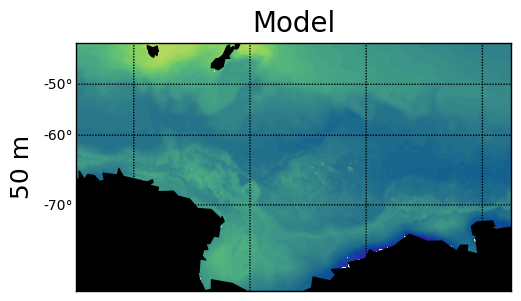

In [64]:
plot_fig2(XC, YC, mean_Salt_50, cbar_levels=np.linspace(32.55,35.76,50), \
          left=1, bottom=0, \
          if_title=True, title='Model', \
          if_ylabel=True, ylabel='50 m',\
          save=True, title_save='model_S_50m.png')

min : 32.5651817322 max : 35.7589683533


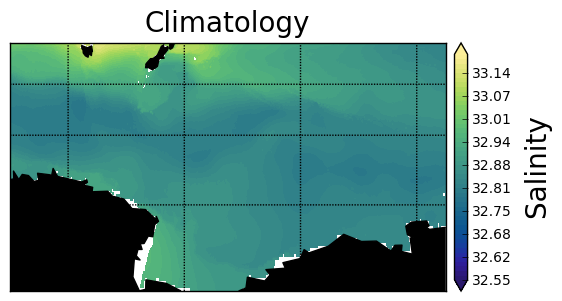

In [57]:
plot_fig2(LON_new, LAT, clim_Salt_50, cbar_levels=np.linspace(32.55,35.76,50),\
          left=0, bottom=0, \
          if_title=True, title='Climatology', if_cbar=True, title_colorbar='Salinity ', \
          save=True, title_save='data_S_50m.png')

min : 34.0711880829 max : 35.2424938195


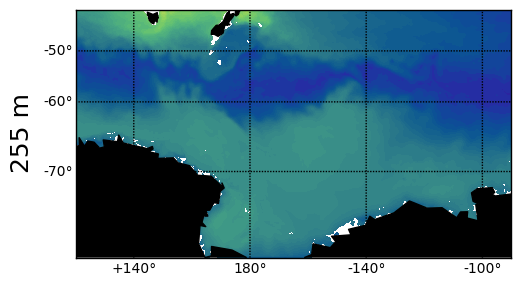

In [58]:
plot_fig2(XC, YC, mean_Salt_255, cbar_levels=np.linspace(33.92,35.50,50), \
          left=1, bottom=1, \
          if_ylabel=True, ylabel='255 m',
          save=True, title_save='model_S_255m.png')

min : 33.9383163452 max : 35.4943656921


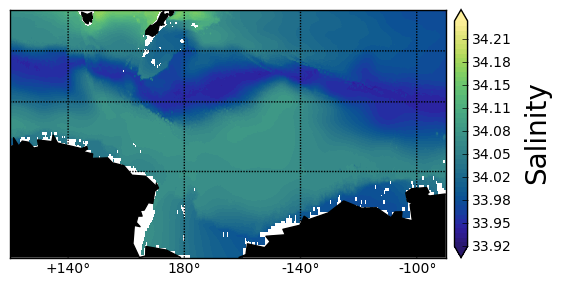

In [60]:
plot_fig2(LON_new, LAT, clim_Salt_255, cbar_levels=np.linspace(33.92,35.50,50), \
          left=0, bottom=1, \
          if_cbar=True, title_colorbar='Salinity', \
          save=True, title_save='data_S_255m.png')

In [ ]:
plot_fig2(LON_new, LAT, clim_Salt_255, cbar_levels=np.linspace(33.92,35.50,50), \
          left=0, bottom=1, \
          if_cbar=True, title_colorbar='Salinity', \
          save=True, title_save='data_S_255m.png')

## Attemps to put on same plot

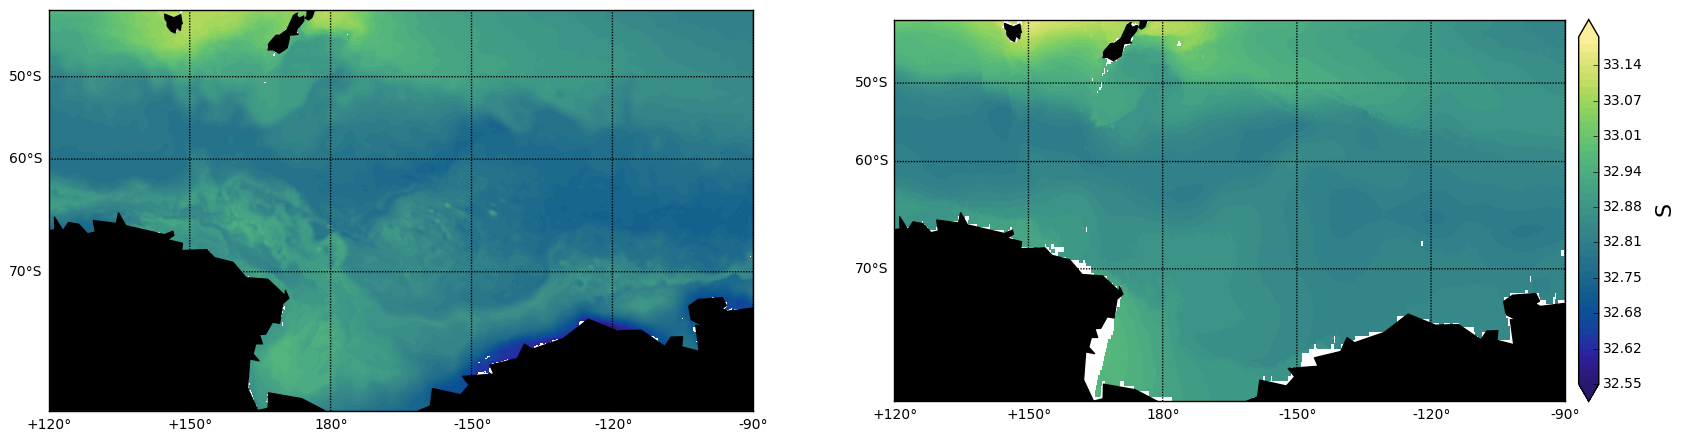

In [231]:
fig     = plt.figure(figsize=(20,17))
m       = Basemap(projection='merc',llcrnrlat=-78.,urcrnrlat=-40.,llcrnrlon=120.,urcrnrlon=270.,lat_ts=-60.,resolution='c')
#fig.suptitle('Salinity for model (left) and data (right)', fontsize=18, y=1.04)

cbar_levels=np.linspace(32.55,35.76,50)
cmap=cmocean.cm.haline

ax1 =  fig.add_subplot(121)
#ax1.set_ylabel('50 (m)', fontsize=20, labelpad=55)
xm, ym  = m(XC, YC)
im      = m.contourf(xm, ym, mean_Salt_50, levels=cbar_levels, extend='both', cmap=cmap)
m.fillcontinents(color='k', lake_color='k')
m.drawparallels(np.arange(-80.,-20.,10), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(120.,301.,30), labels=[0, 0, 0, 1], labelstyle='+/-')
m.drawcoastlines()

ax2 = fig.add_subplot(122)
#ax2.set_ylabel('', fontsize=5, labelpad=5)
xm, ym  = m(LON_new, LAT)
im      = m.contourf(xm, ym, clim_Salt_50, levels=cbar_levels, extend='both', cmap=cmap)

title_colorbar='S'
cbar = m.colorbar(im, pad='2%', size='3%')
cbar.set_label(title_colorbar, fontsize=16, labelpad=10)
levels  = cbar_levels
bounds = [round(levels[i], 2) for i in range(len(levels))]
cbar.ax.set_yticklabels(bounds)

m.fillcontinents(color='k', lake_color='k')
m.drawparallels(np.arange(-80.,-20.,10), labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(120.,301.,30), labels=[0, 0, 0, 1], labelstyle='+/-')
m.drawcoastlines()


min : 32.6182127643 max : 35.3682223086
min : 32.5651817322 max : 35.7589683533


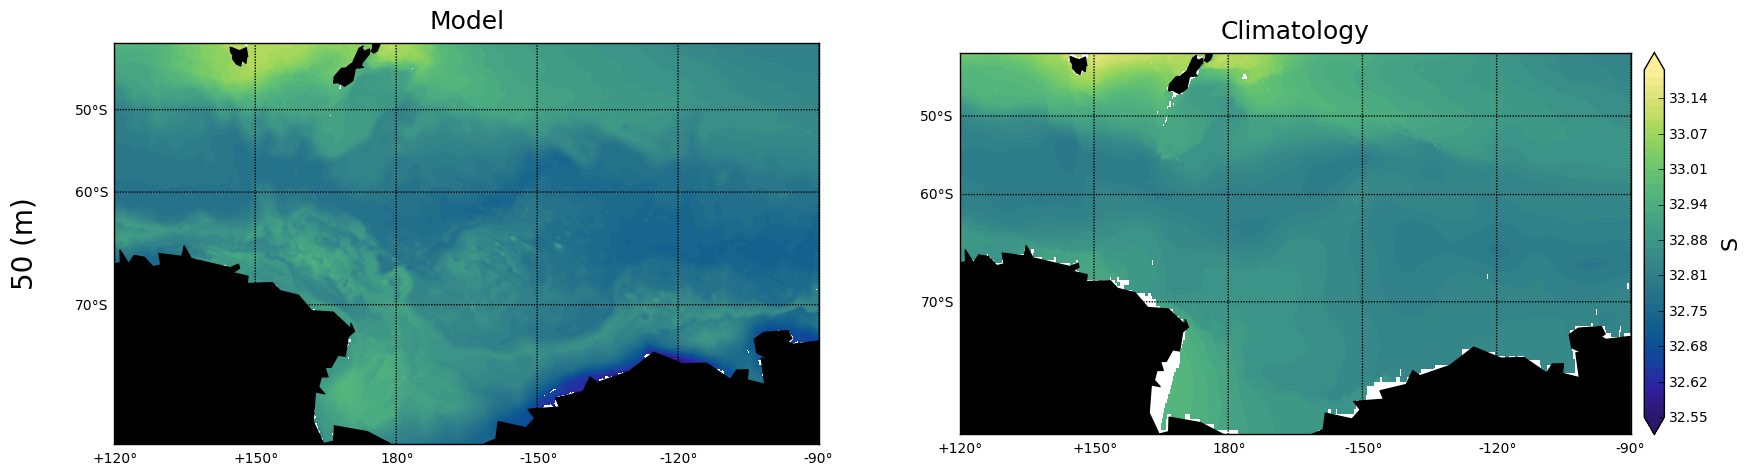

In [225]:
fig = plt.figure(figsize=(20,17))
ax1 =  fig.add_subplot(221)
ax1.set_ylabel('50 (m)', fontsize=20, labelpad=55)

plot_fig2(XC, YC, data=mean_Salt_50, title='Model', cbar_levels=np.linspace(32.55,35.76,50), title_colorbar='S', cmap=cmocean.cm.haline)


#ax1.set_xlabel('Model', fontsize=16, labelpad=40)

fig.add_subplot(222)
m, im = plot_fig2(LON_new, LAT, data=clim_Salt_50, title='Climatology', cbar_levels=np.linspace(32.55,35.76,50), title_colorbar='S', cmap=cmocean.cm.haline)

cbar_levels=np.linspace(32.55,35.76,50)
title_colorbar='S'
cmap=cmocean.cm.haline
cbar = m.colorbar(im, pad='2%', size='3%')
cbar.set_label(title_colorbar, fontsize=16, labelpad=10)
levels  = cbar_levels
bounds = [round(levels[i], 2) for i in range(len(levels))]
cbar.ax.set_yticklabels(bounds)
